# Exercise 3  
**It is taken originally from 
"https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb"**  


In [15]:
from __future__ import print_function
#We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display
import os

# Mel spectrogram

This first step will show how to compute a Mel spectrogram from an audio waveform.


In [23]:
audio_path = 'audioFiles/arctic_a0001.wav'
audioPath = os.listdir("audioFiles")
abc = []
for i in audioPath:
    y, sr = librosa.load(audio_path)
    abc.append(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T)
    #mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc[0]

print(abc)

[array([[-544.49084  ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [-544.49084  ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [-543.4419   ,    1.4357463,    1.4752991, ...,    1.3818   ,
           1.4101582,    1.3700562],
       ...,
       [-540.6511   ,    5.423752 ,    5.404579 , ...,    4.824969 ,
           4.7065964,    4.5802565],
       [-543.1365   ,    1.9148024,    1.9128828, ...,    1.8520617,
           1.8389127,    1.8245765],
       [-544.49084  ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ]], dtype=float32), array([[-544.49084  ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [-544.49084  ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [-543.4419   ,    1.4357463,    1.4752991, ...,    1.3818   ,
           1.4101582,    1.3700562],
       ...,
    

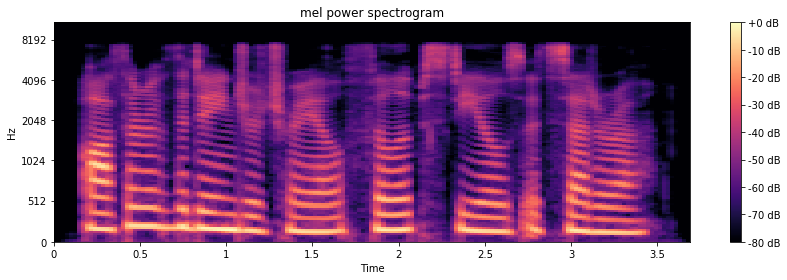

In [13]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


# MFCC

Mel-frequency cepstral coefficients are commonly used to represent texture or timbre of sound.


In [14]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print(mfcc.T)

[[-544.49084      0.           0.        ...    0.           0.
     0.       ]
 [-544.49084      0.           0.        ...    0.           0.
     0.       ]
 [-543.4419       1.4357463    1.4752991 ...    1.3818       1.4101582
     1.3700562]
 ...
 [-540.6511       5.423752     5.404579  ...    4.824969     4.7065964
     4.5802565]
 [-543.1365       1.9148024    1.9128828 ...    1.8520617    1.8389127
     1.8245765]
 [-544.49084      0.           0.        ...    0.           0.
     0.       ]]


In [10]:
print(mfcc.shape)

(13, 168)


In [11]:
np.array(mfcc.T).shape

(168, 13)